In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [ ]:
data.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','Fence','Id','LotFrontage'],axis=1,inplace=True)

In [ ]:
col=data.columns
cat_col=[]
for i in col:
  count=data[i].unique().shape[0]
  if count<=10:
    cat_col.append(i)

cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
con_col=[]
non_obj_data=data.dtypes[data.dtypes.values != 'object'].index
obj_data=data.dtypes[data.dtypes.values == 'object'].index
for i in non_obj_data:
  if i not in cat_col:
    con_col.append(i)

con_col

['MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

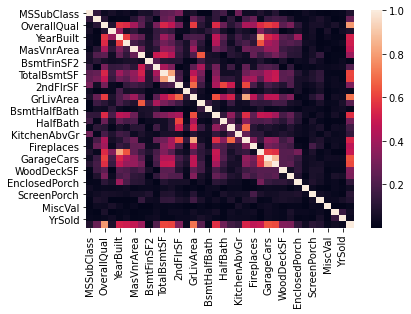

In [ ]:
con_data=data.copy()
con_data.drop(obj_data,axis=1,inplace=True)
data_corr=con_data.corr().abs()
sns.heatmap(data_corr)

In [ ]:
visited={}
col_max_cor=[]
for i in data_corr.columns:
  for j in data_corr.index:
    cor=data_corr.loc[i,j]
    if cor>=0.85 and i!=j:
      x=visited.get(i)
      y=visited.get(j)
      if x!=None and y!=None:
        col_max_cor.append(j)
      else:    
        visited[i]=True
        visited[j]=True
        col_max_cor.append(j)      

col_max_cor

['GarageArea', 'GarageCars']

In [ ]:
data_corr['SalePrice'].sort_values(ascending=False) 

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


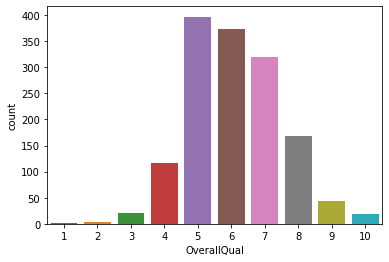

In [ ]:
sns.countplot(data['OverallQual'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


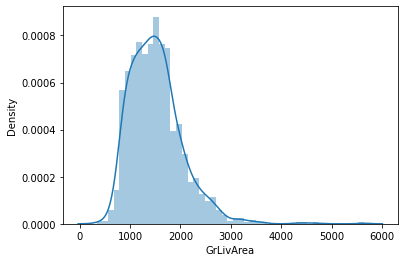

In [ ]:
sns.distplot(data['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


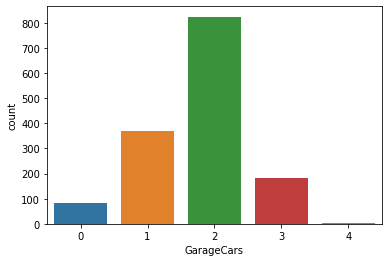

In [ ]:
sns.countplot(data['GarageCars'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


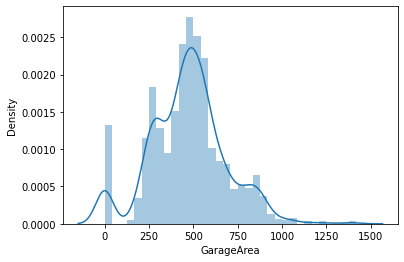

In [ ]:
sns.distplot(data['GarageArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


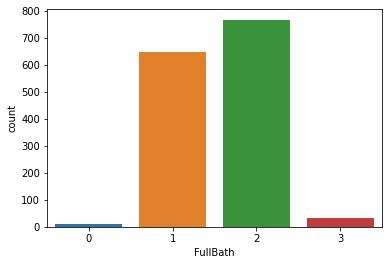

In [ ]:
sns.countplot(data['FullBath'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


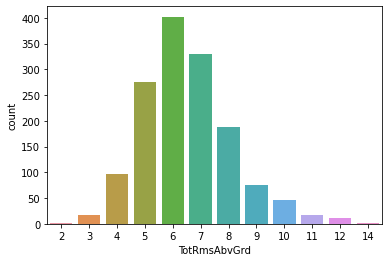

In [ ]:
sns.countplot(data['TotRmsAbvGrd'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


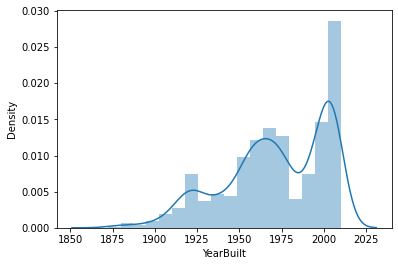

In [ ]:
sns.distplot(data['YearBuilt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


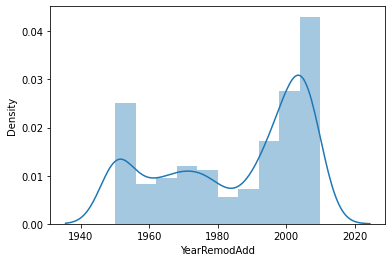

In [ ]:
sns.distplot(data['YearRemodAdd'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


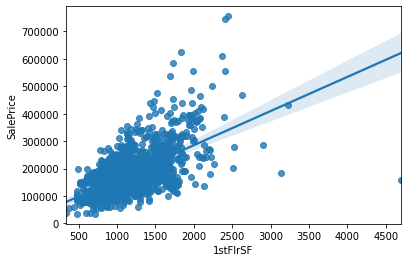

In [ ]:
sns.regplot(data['1stFlrSF'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


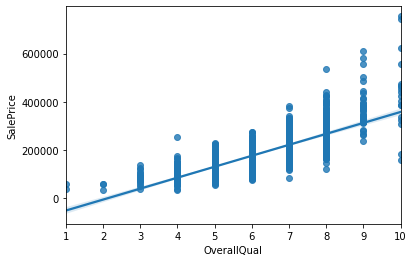

In [ ]:
sns.regplot(data['OverallQual'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


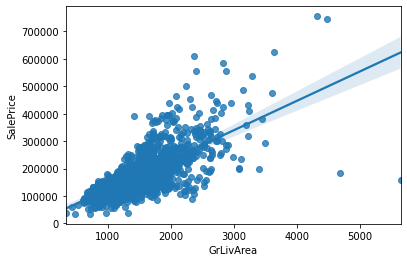

In [ ]:
sns.regplot(data['GrLivArea'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


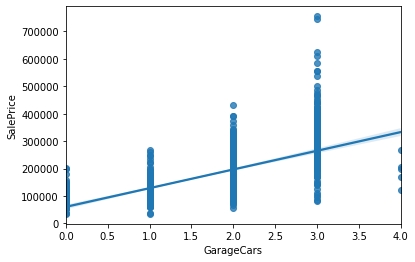

In [ ]:
sns.regplot(data['GarageCars'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


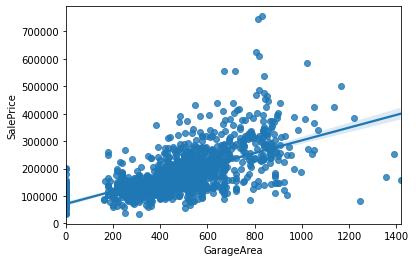

In [ ]:
sns.regplot(data['GarageArea'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


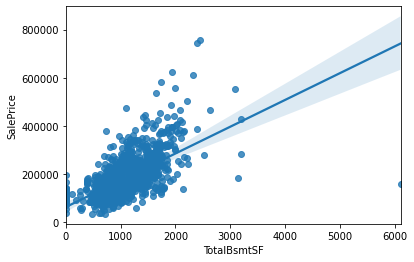

In [ ]:
sns.regplot(data['TotalBsmtSF'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


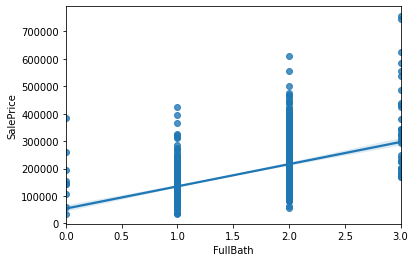

In [ ]:
sns.regplot(data['FullBath'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


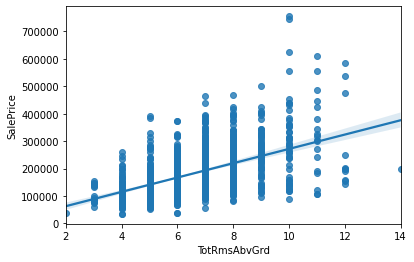

In [ ]:
sns.regplot(data['TotRmsAbvGrd'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


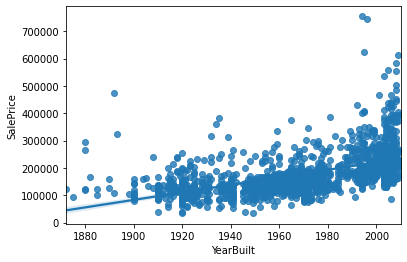

In [ ]:
sns.regplot(data['YearBuilt'],data['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


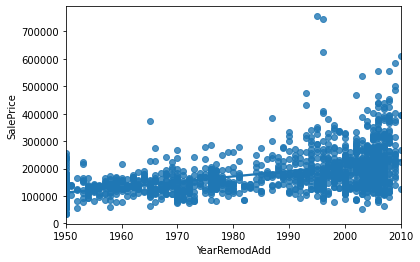

In [ ]:
sns.regplot(data['YearRemodAdd'],data['SalePrice'])

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(14)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
YearRemodAdd     0
dtype: int64

In [ ]:
to_fill=data.isnull().sum().sort_values(ascending=False).head(13).index

In [ ]:
for i in to_fill:
  if i in non_obj_data:
    data[i]=data[i].fillna(data[i].mean())

In [ ]:
for i in to_fill:
  if i in cat_col:
    v=data[i].value_counts().index[0]
    c=data[i].isnull().sum()
    miss_per=c/data.shape[0]
    if miss_per <0.25:
      data[i]=data[i].fillna(v)  

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(14)

SalePrice       0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
dtype: int64

In [ ]:
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
data['Electrical']=data['Electrical'].fillna('SBrkr')

In [ ]:
from sklearn.preprocessing import LabelEncoder
chi_col=[]
for i in data.columns:
  if i in obj_data and i in cat_col:
    chi_col.append(i)

chi_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
le=LabelEncoder()
data[chi_col]=data[chi_col].apply(le.fit_transform)

In [ ]:
data_without_removing=data.copy()

In [ ]:
obj_data_rem=data.dtypes[data.dtypes.values == 'object'].index
obj_data_rem

Index(['Neighborhood', 'Exterior1st', 'Exterior2nd'], dtype='object')

In [ ]:
data.drop(obj_data_rem,axis=1,inplace=True)
data_without_removing.drop(obj_data_rem,axis=1,inplace=True)
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,2,2,0,5,7,5,2003,2003,1,1,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,1,2,0,2,6,8,1976,1976,1,1,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,2,2,0,5,7,5,2001,2002,1,1,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,2,2,0,5,7,5,1915,1970,1,1,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,2,2,0,5,8,5,2000,2000,1,1,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [ ]:
chi_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

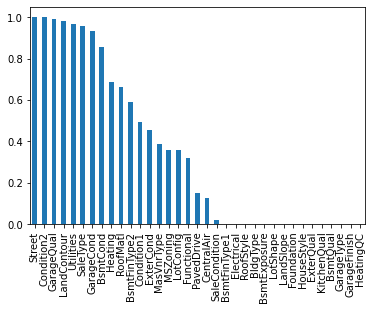

In [ ]:
from sklearn.feature_selection import chi2
rem_col=set()
X_chi=data.loc[:,chi_col]
Y_chi=pd.DataFrame(data['OverallQual'])
chi_score=chi2(X_chi,Y_chi)
pval=pd.Series(chi_score[1],index=chi_col)
pval.sort_values(ascending=False,inplace=True)
pval.plot.bar()

In [ ]:
chi_rem=pval[pval.values>0.4].index

In [ ]:
data.drop(chi_rem,axis=1,inplace=True)
data

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,3,8450,3,4,0,0,5,7,5,2003,2003,1,1,196.0,2,2,2,3,2,706,0,150,856,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,2,0,61,0,0,0,0,0,2,2008,4,208500
1,20,3,9600,3,2,0,0,2,6,8,1976,1976,1,2,0.0,3,1,2,1,0,978,0,284,1262,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,2,298,0,0,0,0,0,0,5,2007,4,181500
2,60,3,11250,0,4,0,0,5,7,5,2001,2002,1,1,162.0,2,2,2,2,2,486,0,434,920,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,2,0,42,0,0,0,0,0,9,2008,4,223500
3,70,3,9550,0,0,0,0,5,7,5,1915,1970,1,2,0.0,3,0,3,3,0,216,0,540,756,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,2,0,35,272,0,0,0,0,2,2006,0,140000
4,60,3,14260,0,2,0,0,5,8,5,2000,2000,1,1,350.0,2,2,2,0,2,655,0,490,1145,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,2,192,84,0,0,0,0,0,12,2008,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,4,0,0,5,6,5,1999,2000,1,2,0.0,3,2,2,3,5,0,0,953,953,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,1999.0,1,2,460,2,0,40,0,0,0,0,0,8,2007,4,175000
1456,20,3,13175,3,4,0,0,2,6,6,1978,1988,1,3,119.0,3,1,2,3,0,790,163,589,1542,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,1978.0,2,2,500,2,349,0,0,0,0,0,0,2,2010,4,210000
1457,70,3,9042,3,4,0,0,5,7,9,1941,2006,1,2,0.0,0,4,3,3,2,275,0,877,1152,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,1941.0,1,1,252,2,0,60,0,0,0,0,2500,5,2010,4,266500
1458,20,3,9717,3,4,0,0,2,5,6,1950,1996,3,2,0.0,3,1,3,2,2,49,1029,0,1078,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,1950.0,2,1,240,2,366,0,112,0,0,0,0,4,2010,4,142125


In [ ]:
data.drop(['YrSold','GarageYrBlt','YearBuilt','YearRemodAdd','MiscVal'],axis=1,inplace=True)
data

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition,SalePrice
0,60,3,8450,3,4,0,0,5,7,5,1,1,196.0,2,2,2,3,2,706,0,150,856,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,1,2,548,2,0,61,0,0,0,0,2,4,208500
1,20,3,9600,3,2,0,0,2,6,8,1,2,0.0,3,1,2,1,0,978,0,284,1262,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1,2,460,2,298,0,0,0,0,0,5,4,181500
2,60,3,11250,0,4,0,0,5,7,5,1,1,162.0,2,2,2,2,2,486,0,434,920,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,1,2,608,2,0,42,0,0,0,0,9,4,223500
3,70,3,9550,0,0,0,0,5,7,5,1,2,0.0,3,0,3,3,0,216,0,540,756,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,2,3,642,2,0,35,272,0,0,0,2,0,140000
4,60,3,14260,0,2,0,0,5,8,5,1,1,350.0,2,2,2,0,2,655,0,490,1145,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,1,3,836,2,192,84,0,0,0,0,12,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,4,0,0,5,6,5,1,2,0.0,3,2,2,3,5,0,0,953,953,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,1,1,2,460,2,0,40,0,0,0,0,8,4,175000
1456,20,3,13175,3,4,0,0,2,6,6,1,3,119.0,3,1,2,3,0,790,163,589,1542,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,1,2,2,500,2,349,0,0,0,0,0,2,4,210000
1457,70,3,9042,3,4,0,0,5,7,9,1,2,0.0,0,4,3,3,2,275,0,877,1152,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,1,1,1,252,2,0,60,0,0,0,0,5,4,266500
1458,20,3,9717,3,4,0,0,2,5,6,3,2,0.0,3,1,3,2,2,49,1029,0,1078,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,1,2,1,240,2,366,0,112,0,0,0,4,4,142125


In [ ]:
from sklearn.model_selection import train_test_split
X_data=data.drop('SalePrice',axis=1)
Y_data=pd.DataFrame(data['SalePrice'])
X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grboost=GradientBoostingRegressor(n_estimators=350,criterion='mse',max_features='sqrt',max_depth=5,min_samples_split=4)
grboost.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_tr=cross_val_score(grboost,X_train,y_train.values.ravel(),cv=5,scoring='r2')
print("for train set")
print(scores_tr)
print(np.mean(scores_tr))

for train set
[0.92552917 0.86991374 0.85586714 0.76117192 0.84959656]
0.8524157040472566


In [ ]:
y_pred=grboost.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean squared error: ",mse)
print("")
print("root mean squared error: ",np.sqrt(mse))
print("")
print("R sq:   ",r2)

mean squared error:  781695409.1101431

root mean squared error:  27958.816303809126

R sq:    0.8870969325860092
